In [36]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns

In [3]:
df = pd.read_excel('apartment_deals_price.xlsx', 'Sheet1')

In [23]:
df

,area,building_number,apartment_name,size,contract_month,contract_day,price,floor,built_year,address
0,서울특별시 강남구 개포동,655-2,개포2차현대아파트(220),77.75,4,15,1740000000,9,1988,언주로 103
1,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,5,15,1950000000,5,1987,언주로 3
2,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,8,11,2000000000,3,1987,언주로 3
3,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,9,2,2200000000,2,1987,언주로 3
4,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,12,4,2150000000,3,1987,언주로 3
...,...,...,...,...,...,...,...,...,...,...
43371,서울특별시 중랑구 중화동,274-51,한영(101),57.66,2,27,305000000,5,2003,동일로144길 74
43372,서울특별시 중랑구 중화동,274-51,한영(101),84.69,11,4,500000000,2,2003,동일로144길 74
43373,서울특별시 중랑구 중화동,274-75,한영(102),72.22,5,4,495000000,4,2003,동일로144길 74
43374,서울특별시 중랑구 중화동,274-76,한영(103),58.46,7,1,300000000,2,2003,동일로144길 74


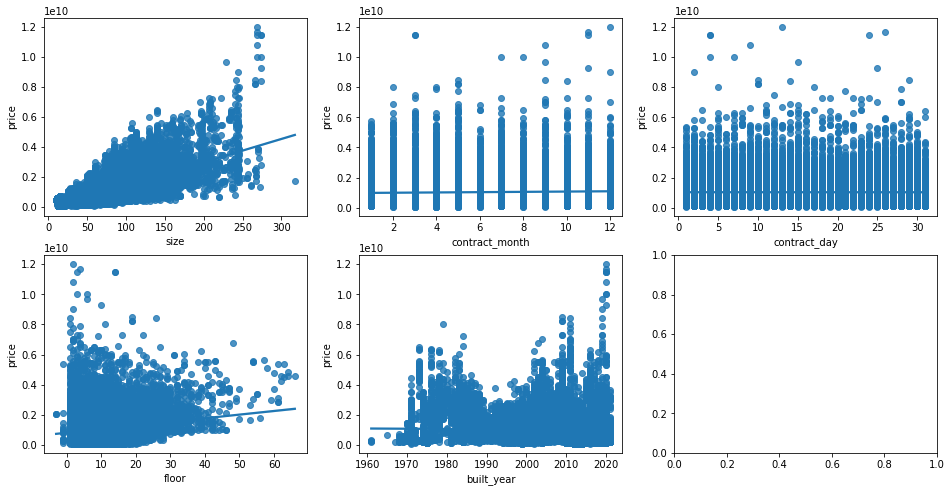

In [28]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(16,8) , ncols=3, nrows=2)
features = ['size', 'contract_month', 'contract_day', 'floor', 'built_year']
for i, feature in enumerate(features):
	row = int(i/3)
	col = i%3
	sns.regplot(x=feature, y='price', data=df, ax=axs[row][col])

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = df['price']
X_data = df.drop(['price', 'area', 'building_number', 'apartment_name', 'address'], axis=1, inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 304303435768886976.000 , RMSE : 551637050.758
Variance score : 0.489


In [33]:
coeff = pd.Series(data=np.round(lr.coef_, 2), index=X_data.columns)
coeff.sort_values(ascending=False)

size              15077760.65
floor             15005173.56
contract_month    13272116.76
built_year         1133364.44
contract_day        599922.44
dtype: float64

In [31]:
lr.coef_

array([15077760.64835664, 13272116.7607232 ,   599922.43704707,
       15005173.55633059,  1133364.43753021])

In [35]:
df.cov()['price']

size              1.690390e+10
contract_month    9.293981e+07
contract_day     -7.601483e+06
price             5.636872e+17
floor             9.410658e+08
built_year       -1.604358e+08
Name: price, dtype: float64

In [61]:
import math

coeff.sort_values(ascending=False, inplace=True)
res = ''
for idx, item in enumerate(coeff.items()):
	name, value = item
	if idx == 0:
		op = ''
	else:
		op = ' + '
	res += op + '*'.join([str(value), name])

if lr.intercept_ > 0:
	res += " + " + str(math.fabs(lr.intercept_))
else:
	res += " - " + str(math.fabs(lr.intercept_))

print(res) 

15077760.65*size + 15005173.56*floor + 13272116.76*contract_month + 1133364.44*built_year + 599922.44*contract_day - 2572745498.958506


In [70]:
import math

coeff = pd.Series(data=np.round(lr.coef_, 2), index=X_data.columns)
coeff.sort_values(ascending=False)

coeff.sort_values(ascending=False, inplace=True)
res = 'price = '
for idx, item in enumerate(coeff.items()):
  name, value = item
  if idx == 0:
    op = ''
  else:
    if value > 0:
      op = ' + '
    else:
      op = ' - '
  res += op + '*'.join([str(math.fabs(value)), name])

if lr.intercept_ > 0:
  res += " + " + str(math.fabs(lr.intercept_))
else:
  res += " - " + str(math.fabs(lr.intercept_))

print()

print('[Linear regression]')
print(res)

print()

print('[Sorted covariance of all variables in terms of price]')
df.cov()['price'][df.cov()['price'].abs().sort_values(ascending=False).keys()]


[Linear regression]
price = 15077760.65*size + 15005173.56*floor + 13272116.76*contract_month + 1133364.44*built_year + 599922.44*contract_day - 2572745498.958506

[Covariance of all variables in terms of price]
size              1.690390e+10
contract_month    9.293981e+07
contract_day     -7.601483e+06
price             5.636872e+17
floor             9.410658e+08
built_year       -1.604358e+08
Name: price, dtype: float64


price             5.636872e+17
size              1.690390e+10
floor             9.410658e+08
built_year       -1.604358e+08
contract_month    9.293981e+07
contract_day     -7.601483e+06
Name: price, dtype: float64